In [1]:
%matplotlib inline

The `behroozi10` model is a pre-built stellar-to-halo-mass model based on subhalos. You can instantiate a class of it like this:

In [2]:
from halotools.empirical_models import PrebuiltSubhaloModelFactory

model1 = PrebuiltSubhaloModelFactory('behroozi10', redshift=0)


You can inspect the parameters of this model (and any Halotools model) by printing the `param_dict` attribute:

In [3]:
model1.param_dict

{u'scatter_model_param1': 0.2,
 u'smhm_beta_0': 0.43,
 u'smhm_beta_a': 0.18,
 u'smhm_delta_0': 0.56,
 u'smhm_delta_a': 0.18,
 u'smhm_gamma_0': 1.54,
 u'smhm_gamma_a': 2.52,
 u'smhm_m0_0': 10.72,
 u'smhm_m0_a': 0.59,
 u'smhm_m1_0': 12.35,
 u'smhm_m1_a': 0.3}

Notice that the first parameter is `scatter_model_param1` - this controls the level of scatter (in dex) in stellar mass at fixed halo mass. By default, there is only one scatter parameter, and so scatter is assumed constant. 

This default behavior is easy to modify using the `scatter_abscissa` and `scatter_ordinates` arguments. These two arguments control the level of scatter as a function of $\log_{10}M_{\rm halo}.$ 

In [4]:
model2 = PrebuiltSubhaloModelFactory('behroozi10', redshift=0, 
            scatter_abscissa=[12, 15], scatter_ordinates=[0.4, 0.2])

In [5]:
model2.param_dict

{u'scatter_model_param1': 0.40000000000000002,
 u'scatter_model_param2': 0.20000000000000001,
 u'smhm_beta_0': 0.43,
 u'smhm_beta_a': 0.18,
 u'smhm_delta_0': 0.56,
 u'smhm_delta_a': 0.18,
 u'smhm_gamma_0': 1.54,
 u'smhm_gamma_a': 2.52,
 u'smhm_m0_0': 10.72,
 u'smhm_m0_a': 0.59,
 u'smhm_m1_0': 12.35,
 u'smhm_m1_a': 0.3}

Notice that there are now two scatter parameters. The first parameter regulates the scatter at $M_{\rm halo}=10^{12}M_{\odot}$, the second at $M_{\rm halo}=10^{15}M_{\odot}$ - the two abscissa values we chose.

Let's verify that the model behaves as expected by generating a Monte Carlo realization of stellar mass at $10^5$ halos of the same mass:

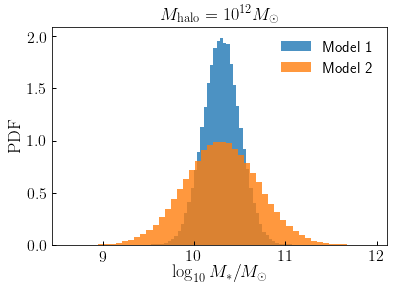

In [6]:
num_halos = int(1e5)
halo_mass = np.zeros(num_halos) + 10**12

mstar1 = model1.mc_stellar_mass(prim_haloprop=halo_mass)
mstar2 = model2.mc_stellar_mass(prim_haloprop=halo_mass)

fig, ax = plt.subplots(1, 1)

__=ax.hist(np.log10(mstar1), bins=50, alpha=0.8, normed=True, label=r'Model 1')
__=ax.hist(np.log10(mstar2), bins=50, alpha=0.8, normed=True, label=r'Model 2')

title = ax.set_title(r'$M_{\rm halo} = 10^{12}M_{\odot}$')
xlabel = ax.set_xlabel(r'$\log_{10} M_{\ast}/M_{\odot}$')
ylabel = ax.set_ylabel(r'${\rm PDF}$')
legend = ax.legend()

In [7]:
print("Model 1 scatter = {0:.3f} dex".format(np.std(np.log10(mstar1))))

print("Model 2 scatter = {0:.3f} dex".format(np.std(np.log10(mstar2))))

Model 1 scatter = 0.200 dex
Model 2 scatter = 0.400 dex


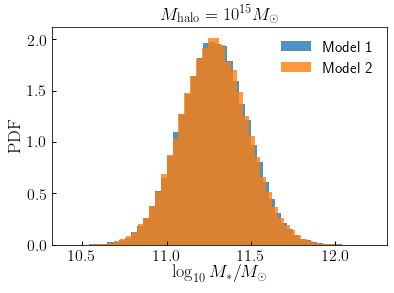

In [8]:
num_halos = int(1e5)
halo_mass = np.zeros(num_halos) + 10**15

mstar1 = model1.mc_stellar_mass(prim_haloprop=halo_mass)
mstar2 = model2.mc_stellar_mass(prim_haloprop=halo_mass)

fig, ax = plt.subplots(1, 1)

__=ax.hist(np.log10(mstar1), bins=50, alpha=0.8, normed=True, label=r'Model 1')
__=ax.hist(np.log10(mstar2), bins=50, alpha=0.8, normed=True, label=r'Model 2')

title = ax.set_title(r'$M_{\rm halo} = 10^{15}M_{\odot}$')
xlabel = ax.set_xlabel(r'$\log_{10} M_{\ast}/M_{\odot}$')
ylabel = ax.set_ylabel(r'${\rm PDF}$')
legend = ax.legend()

In [9]:
print("Model 1 scatter = {0:.3f} dex".format(np.std(np.log10(mstar1))))

print("Model 2 scatter = {0:.3f} dex".format(np.std(np.log10(mstar2))))

Model 1 scatter = 0.200 dex
Model 2 scatter = 0.200 dex


At intermediate values of halo mass, the level of scatter is interpolated in log halo mass:

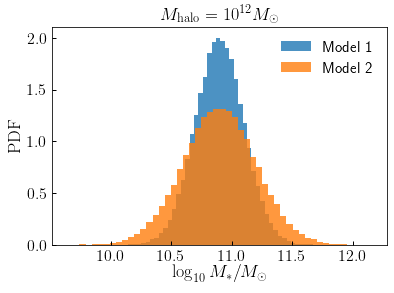

In [10]:
num_halos = int(1e5)
halo_mass = np.zeros(num_halos) + 10**13.5

mstar1 = model1.mc_stellar_mass(prim_haloprop=halo_mass)
mstar2 = model2.mc_stellar_mass(prim_haloprop=halo_mass)

fig, ax = plt.subplots(1, 1)

__=ax.hist(np.log10(mstar1), bins=50, alpha=0.8, normed=True, label=r'Model 1')
__=ax.hist(np.log10(mstar2), bins=50, alpha=0.8, normed=True, label=r'Model 2')

title = ax.set_title(r'$M_{\rm halo} = 10^{12}M_{\odot}$')
xlabel = ax.set_xlabel(r'$\log_{10} M_{\ast}/M_{\odot}$')
ylabel = ax.set_ylabel(r'${\rm PDF}$')
legend = ax.legend()

In [11]:
print("Model 1 scatter = {0:.3f} dex".format(np.std(np.log10(mstar1))))

print("Model 2 scatter = {0:.3f} dex".format(np.std(np.log10(mstar2))))

Model 1 scatter = 0.200 dex
Model 2 scatter = 0.300 dex
